In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline
current_palette = sns.color_palette("Set2")
sns.set_palette(current_palette)
np.set_printoptions(suppress=True, precision=3)
pd.set_option("display.precision",3)

In [2]:
from sklearn.datasets import load_iris
iris =  load_iris()
iris_map ={index:value for index,value in enumerate(iris.target_names) }
print(iris_map)


data = pd.DataFrame(data = iris.data , columns =iris.feature_names)  
target = pd.DataFrame(data = iris.target ,columns =['class'] )

iris_dataset  =pd.concat([data,target],axis=1)
print("="*80)
print(iris.target)
print(iris_dataset.shape)
print(data.shape)
print(target.shape) 
print("="*80)
print(iris_dataset.head())


{0: 'setosa', 1: 'versicolor', 2: 'virginica'}
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
(150, 5)
(150, 4)
(150, 1)
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   class  
0      0  
1      0  
2      0  
3      0  
4      0  


In [3]:
from sklearn.utils import shuffle
X, y = shuffle(data, target)

In [4]:
print(X[:30])

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
127                6.1               3.0                4.9               1.8
103                6.3               2.9                5.6               1.8
47                 4.6               3.2                1.4               0.2
84                 5.4               3.0                4.5               1.5
28                 5.2               3.4                1.4               0.2
34                 4.9               3.1                1.5               0.1
85                 6.0               3.4                4.5               1.6
101                5.8               2.7                5.1               1.9
145                6.7               3.0                5.2               2.3
16                 5.4               3.9                1.3               0.4
87                 6.3               2.3                4.4               1.3
23                 5.1               3.3                1.7     

In [5]:
rng = np.random.RandomState(0)
X_missing_column = X.values.copy()
mask = X.sum(axis=1) < rng.normal(loc=19, scale=3, size=X.shape[0])
X_missing_column[mask, 0] = np.NaN
X_missing_column[120:]

array([[ nan,  3. ,  1.1,  0.1],
       [ nan,  2.9,  4.6,  1.3],
       [ nan,  3.1,  5.4,  2.1],
       [ nan,  3.2,  4.7,  1.4],
       [ 6.2,  3.4,  5.4,  2.3],
       [ nan,  4.4,  1.5,  0.4],
       [ nan,  4. ,  1.2,  0.2],
       [ nan,  4.1,  1.5,  0.1],
       [ nan,  3.7,  1.5,  0.2],
       [ nan,  2.5,  5. ,  2. ],
       [ nan,  2.3,  4. ,  1.3],
       [ nan,  3. ,  1.4,  0.3],
       [ nan,  2.9,  4.5,  1.5],
       [ nan,  2.9,  4.3,  1.3],
       [ 6.9,  3.1,  5.1,  2.3],
       [ nan,  3.3,  5.7,  2.5],
       [ nan,  3.1,  5.5,  1.8],
       [ nan,  2.5,  4. ,  1.3],
       [ nan,  3. ,  6.1,  2.3],
       [ 6.7,  3.1,  5.6,  2.4],
       [ nan,  3.2,  1.6,  0.2],
       [ nan,  3.4,  1.7,  0.2],
       [ nan,  3. ,  1.4,  0.1],
       [ nan,  2.8,  4.9,  2. ],
       [ nan,  3. ,  1.4,  0.2],
       [ nan,  2.8,  5.1,  2.4],
       [ 6.8,  3.2,  5.9,  2.3],
       [ nan,  2.8,  4.7,  1.2],
       [ 6.5,  3. ,  5.8,  2.2],
       [ nan,  2.7,  4.2,  1.3]])

In [6]:
rng = np.random.RandomState(4)
X_missing_rows = X.values.copy()
for i in rng.randint(0, 30, 5):
    X_missing_rows[i, rng.uniform(size=4)> .2] = np.NaN
X_missing_rows[:30]

array([[ 6.1,  3. ,  4.9,  1.8],
       [ nan,  nan,  5.6,  1.8],
       [ 4.6,  3.2,  1.4,  0.2],
       [ 5.4,  3. ,  4.5,  1.5],
       [ 5.2,  3.4,  1.4,  0.2],
       [ nan,  nan,  nan,  nan],
       [ 6. ,  3.4,  4.5,  1.6],
       [ 5.8,  2.7,  5.1,  1.9],
       [ 6.7,  3. ,  5.2,  2.3],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 6.3,  2.3,  4.4,  1.3],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 5.7,  2.8,  4.1,  1.3],
       [ 7.7,  2.6,  6.9,  2.3],
       [ nan,  nan,  nan,  nan],
       [ 6.9,  3.2,  5.7,  2.3],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.6,  3. ,  4.1,  1.3],
       [ 6.4,  2.8,  5.6,  2.2],
       [ 5.6,  3. ,  4.5,  1.5],
       [ 7.4,  2.8,  6.1,  1.9],
       [ 4.4,  3. ,  1.3,  0.2],
       [ 5.7,  2.8,  4.5,  1.3],
       [ 5.5,  nan,  nan,  nan],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 4.9,  3.1,  1.5,  0.1],
       [ nan,  nan,  nan,  1.6],
       [ 6. ,  3. ,  4.8,  1.8],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.2,  3.5,  1.5,  0.2]])

In [7]:
X[y['class']==2].mean(axis=0)

sepal length (cm)    6.588
sepal width (cm)     2.974
petal length (cm)    5.552
petal width (cm)     2.026
dtype: float64

In [8]:
rng = np.random.RandomState(0)
X_some_missing = X.values.copy()
mask = np.abs(X.values[:, 2] - rng.normal(loc=5.5, scale=.7, size=X.shape[0])) < .6
X_some_missing[mask, 3] = np.NaN
# different random numbers
mask2 = np.abs(X.values[:, 2] - rng.normal(loc=5.5, scale=.7, size=X.shape[0])) < .6
X_some_missing[mask2, 2] = np.NaN
X_some_missing[:30]

array([[ 6.1,  3. ,  nan,  1.8],
       [ 6.3,  2.9,  5.6,  nan],
       [ 4.6,  3.2,  1.4,  0.2],
       [ 5.4,  3. ,  nan,  1.5],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 6. ,  3.4,  4.5,  1.6],
       [ 5.8,  2.7,  nan,  nan],
       [ 6.7,  3. ,  nan,  nan],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 6.3,  2.3,  4.4,  1.3],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 5.7,  2.8,  4.1,  1.3],
       [ 7.7,  2.6,  6.9,  2.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 6.9,  3.2,  nan,  nan],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.6,  3. ,  nan,  1.3],
       [ 6.4,  2.8,  5.6,  nan],
       [ 5.6,  3. ,  4.5,  nan],
       [ 7.4,  2.8,  nan,  1.9],
       [ 4.4,  3. ,  1.3,  0.2],
       [ 5.7,  2.8,  4.5,  1.3],
       [ 5.5,  2.4,  3.7,  1. ],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 6. ,  2.7,  nan,  nan],
       [ 6. ,  3. ,  nan,  nan],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.2,  3.5,  1.5,  0.2]])

In [9]:
np.mean(mask)

0.24666666666666667

In [10]:
y[~mask2]['class'].value_counts() 

0    50
1    41
2    22
Name: class, dtype: int64

In [11]:
X_ = X_some_missing

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X_, y, stratify=y, random_state=0)

In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

nan_columns = np.any(np.isnan(X_train), axis=0)
X_drop_columns = X_train[:, ~nan_columns]
logreg = make_pipeline(StandardScaler(), LogisticRegression())
scores = cross_val_score(logreg, X_drop_columns, y_train.values.ravel(), cv=10)
np.mean(scores)

0.79444444444444451

In [14]:
print(X_train[-30:])

[[ 5.7  2.8  4.5  1.3]
 [ 6.4  3.1  5.5  nan]
 [ 5.1  3.7  1.5  0.4]
 [ 4.9  3.   1.4  0.2]
 [ 4.8  3.   1.4  0.3]
 [ 5.1  3.8  1.5  0.3]
 [ 4.4  3.   1.3  0.2]
 [ 5.5  2.3  4.   1.3]
 [ 7.6  3.   6.6  nan]
 [ 6.8  3.2  nan  2.3]
 [ 6.8  3.   nan  2.1]
 [ 4.5  2.3  1.3  0.3]
 [ 6.7  3.3  nan  2.1]
 [ 4.9  3.1  1.5  0.1]
 [ 7.7  2.6  6.9  2.3]
 [ 5.8  4.   1.2  0.2]
 [ 6.1  2.8  4.   1.3]
 [ 6.2  2.2  4.5  1.5]
 [ 5.5  2.4  3.8  1.1]
 [ 5.9  3.2  4.8  nan]
 [ 4.8  3.4  1.6  0.2]
 [ 6.7  3.1  5.6  2.4]
 [ 6.5  3.2  5.1  nan]
 [ 5.4  3.4  1.7  0.2]
 [ 6.7  3.1  4.7  nan]
 [ 6.4  3.2  4.5  nan]
 [ 5.1  3.5  1.4  0.3]
 [ 5.9  3.   5.1  1.8]
 [ 6.9  3.1  5.1  nan]
 [ 7.9  3.8  nan  2. ]]


In [15]:
np.set_printoptions(precision=3)

# Mean Imputation

In [16]:
from sklearn.preprocessing import Imputer
imp = Imputer(strategy="mean").fit(X_train)
X_mean_imp = imp.transform(X_train)
X_mean_imp[-30:]

array([[ 5.7  ,  2.8  ,  4.5  ,  1.3  ],
       [ 6.4  ,  3.1  ,  5.5  ,  1.001],
       [ 5.1  ,  3.7  ,  1.5  ,  0.4  ],
       [ 4.9  ,  3.   ,  1.4  ,  0.2  ],
       [ 4.8  ,  3.   ,  1.4  ,  0.3  ],
       [ 5.1  ,  3.8  ,  1.5  ,  0.3  ],
       [ 4.4  ,  3.   ,  1.3  ,  0.2  ],
       [ 5.5  ,  2.3  ,  4.   ,  1.3  ],
       [ 7.6  ,  3.   ,  6.6  ,  1.001],
       [ 6.8  ,  3.2  ,  3.372,  2.3  ],
       [ 6.8  ,  3.   ,  3.372,  2.1  ],
       [ 4.5  ,  2.3  ,  1.3  ,  0.3  ],
       [ 6.7  ,  3.3  ,  3.372,  2.1  ],
       [ 4.9  ,  3.1  ,  1.5  ,  0.1  ],
       [ 7.7  ,  2.6  ,  6.9  ,  2.3  ],
       [ 5.8  ,  4.   ,  1.2  ,  0.2  ],
       [ 6.1  ,  2.8  ,  4.   ,  1.3  ],
       [ 6.2  ,  2.2  ,  4.5  ,  1.5  ],
       [ 5.5  ,  2.4  ,  3.8  ,  1.1  ],
       [ 5.9  ,  3.2  ,  4.8  ,  1.001],
       [ 4.8  ,  3.4  ,  1.6  ,  0.2  ],
       [ 6.7  ,  3.1  ,  5.6  ,  2.4  ],
       [ 6.5  ,  3.2  ,  5.1  ,  1.001],
       [ 5.4  ,  3.4  ,  1.7  ,  0.2  ],
       [ 6.7  , 

In [17]:
X_mean_imp.shape

(112, 4)

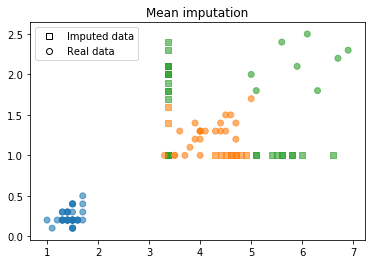

In [18]:
import matplotlib.patches as patches
imputed_mask = np.any(np.isnan(X_train), axis=1)

def plot_imputation(X_imp, title=None, ax=None):
    # helper function to plot imputed data points
    if ax is None:
        ax = plt.gca()
    if title is not None:
        ax.set_title(title)
    ax.scatter(X_imp[imputed_mask, 2], X_imp[imputed_mask, 3], c=plt.cm.Vega10(y_train.values.ravel()[imputed_mask]), alpha=.6, marker="s")
    ax.scatter(X_imp[~imputed_mask, 2], X_imp[~imputed_mask, 3], c=plt.cm.Vega10(y_train.values.ravel()[~imputed_mask]), alpha=.6)
    # this is for creating the legend...
    square = plt.Line2D((0,), (0,), linestyle='', marker="s", markerfacecolor="w", markeredgecolor="k", label='Imputed data')
    circle = plt.Line2D((0,), (0,), linestyle='', marker="o", markerfacecolor="w", markeredgecolor="k", label='Real data')
    plt.legend(handles=[square, circle], numpoints=1, loc="best")

plot_imputation(X_mean_imp, "Mean imputation")

In [19]:
mean_pipe = make_pipeline(Imputer(), StandardScaler(), LogisticRegression())
scores = cross_val_score(mean_pipe, X_train, y_train.values.ravel(), cv=10)
np.mean(scores)

0.81666666666666665

# Model-driven imputation and RandomForest

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import Imputer
X_imputed = Imputer().fit_transform(X_train)

In [21]:
rf = RandomForestRegressor(n_estimators=100)

for i in range(10):
    last = X_imputed.copy()
    for feature in range(X_train.shape[1]):
        inds_not_f = np.arange(X_train.shape[1])
        inds_not_f = inds_not_f[inds_not_f != feature]
        f_missing = np.isnan(X_train[:, feature])
        if not np.any(f_missing):
            continue
        rf.fit(X_imputed[~f_missing][:, inds_not_f], X_train[~f_missing, feature])

        X_imputed[f_missing, feature] = rf.predict(X_imputed[f_missing][:, inds_not_f])

    # this would make more sense if we scaled the data beforehand
    if (np.linalg.norm(last - X_imputed)) < .5:
        print(i)
        break


6


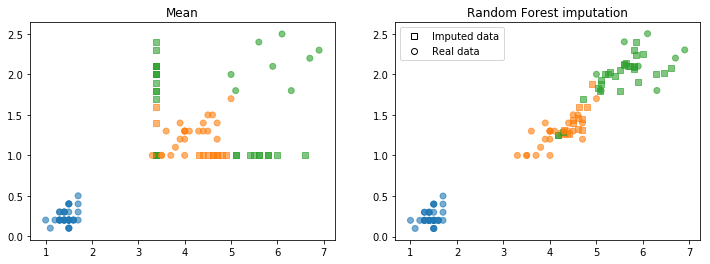

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_imputation(X_mean_imp, "Mean", ax=axes[0])
plot_imputation(X_imputed, "Random Forest imputation", ax=axes[1])

# Feature Selection

In [23]:
from sklearn.datasets import load_boston
boston = load_boston()
X,y  = boston.data,boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

from sklearn.preprocessing import scale
X_train_scaled = scale(X_train)
cmdata = np.cov(X_train_scaled, rowvar=False)

In [24]:
from scipy.cluster import hierarchy
order = np.array(hierarchy.dendrogram(hierarchy.ward(cmdata), no_plot=True)['ivl'], dtype="int")
 

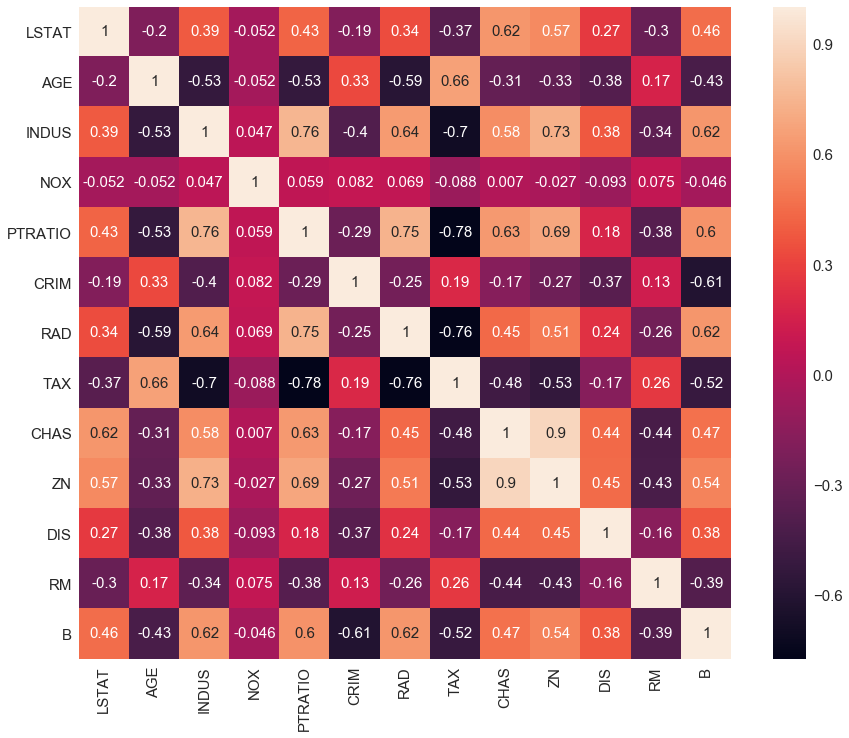

In [25]:
 sns.set(font_scale=1.5)
f, ax = plt.subplots(figsize=(15,12))
hm = sns.heatmap(cmdata,cbar=True,annot=True,square=True,annot_kws={'size': 15},
                 yticklabels=boston.feature_names[order],xticklabels=boston.feature_names[order])  
plt.show()

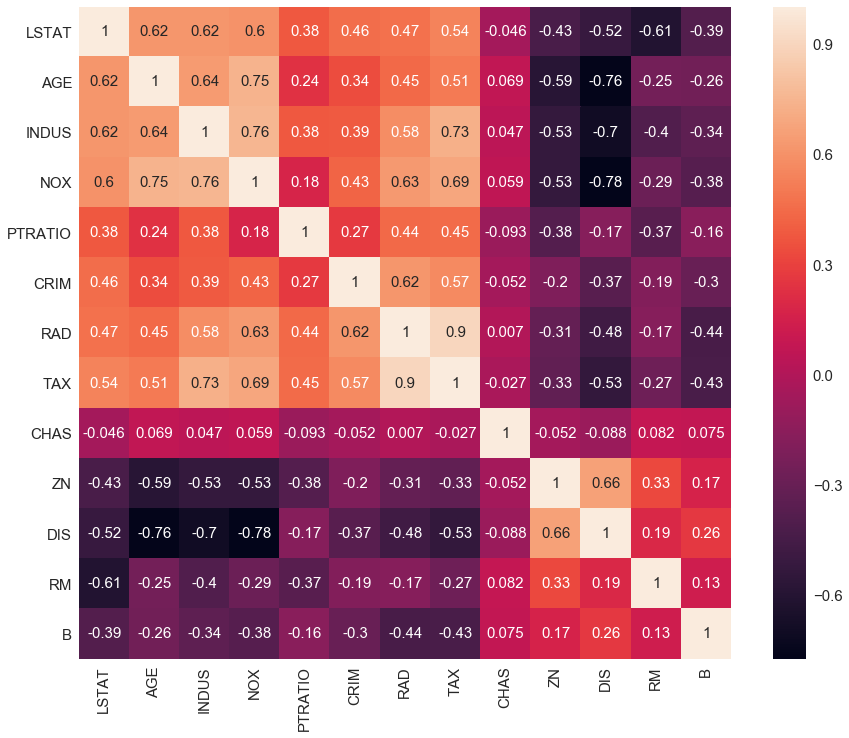

In [26]:
orderdata = cmdata[order, :][:, order]
sns.set(font_scale=1.5)
f, ax = plt.subplots(figsize=(15,12))
hm = sns.heatmap(orderdata,cbar=True,annot=True,square=True,annot_kws={'size': 15},
                 yticklabels=boston.feature_names[order],xticklabels=boston.feature_names[order])  
plt.show()

In [27]:
data = pd.DataFrame(data = boston.data , columns =boston.feature_names)  
target = pd.DataFrame(data = boston.target ,columns =['MEDV'] )

boston_dataset  =pd.concat([data,target],axis=1)

# Supervised feature selection


f-regression feature selection is just a univariate linear model, where features are ranked accordingly to the significance of the regression parameter. This is actually equivalent to ranking features according to their correlation with the target variable.

Estimate mutual information for a continuous target variable.

Mutual information between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

In [28]:
from sklearn.feature_selection import f_regression
f_values, p_values = f_regression(X, y)

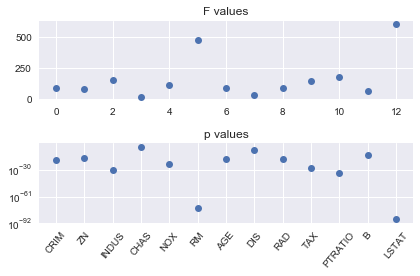

In [36]:
sns.set(font_scale=1.0)
fig, ax = plt.subplots(2, 1)
ax[0].set_title("F values")
ax[0].plot(f_values, 'o')
ax[1].set_title("p values")
ax[1].plot(p_values, 'o')
ax[1].set_yscale("log")

ax[1].set_xticks(range(X.shape[1]))
ax[1].set_xticklabels(boston.feature_names, rotation=50);
fig.tight_layout()

In [30]:
from sklearn.feature_selection import SelectKBest, SelectPercentile, SelectFpr
from sklearn.linear_model import RidgeCV

select = SelectKBest(k=2, score_func=f_regression)
select.fit(X_train, y_train)
print(X_train.shape)
print(select.transform(X_train).shape)

(379, 13)
(379, 2)


In [31]:
all_features = make_pipeline(StandardScaler(), RidgeCV())
select_2 = make_pipeline(StandardScaler(), SelectKBest(k=2, score_func=f_regression), RidgeCV())

In [32]:
np.mean(cross_val_score(all_features, X_train, y_train, cv=10))

0.71798347520832118

In [33]:
np.mean(cross_val_score(select_2, X_train, y_train, cv=10))

0.62436257491684333

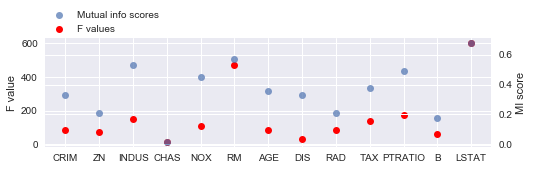

In [35]:
from sklearn.feature_selection import mutual_info_regression
scores = mutual_info_regression(X_train, y_train, discrete_features=[3])

fig = plt.figure(figsize=(8, 2))
line_f, = plt.plot(f_values, 'o', c='r')
plt.ylabel("F value")
ax2 = plt.twinx()
line_s, = ax2.plot(scores, 'o', alpha=.7)
ax2.set_ylabel("MI score")
plt.xticks(range(X.shape[1]), boston.feature_names)
plt.legend([line_s, line_f], ["Mutual info scores", "F values"], loc=(0, 1))